<a href="https://colab.research.google.com/github/anafer25/simpson-integration-and-error-analysis/blob/main/simpson_integration_and_error_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

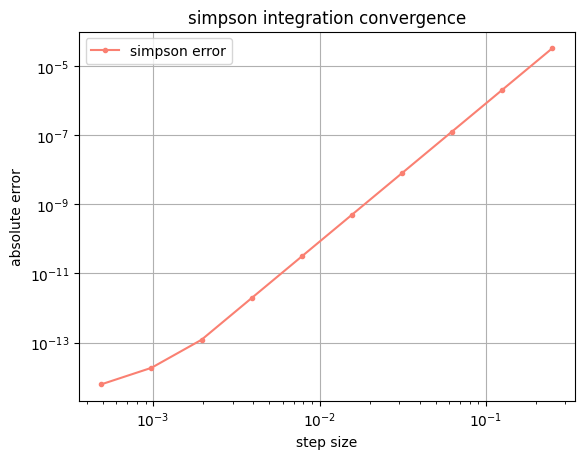

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# define the function to integrate
def func(x):
    return x**4

# implement simpson's 1/3 rule
def simpson_integration(f, left, right, intervals, dx):
    total = 0
    # loop over each interval and apply the simpson weights: 1, 4, 1
    for i in range(intervals):
        x0 = left + i * dx
        x1 = left + (i + 0.5) * dx
        x2 = left + (i + 1) * dx
        total += f(x0) + 4 * f(x1) + f(x2)
    return total * dx / 6

# set integration bounds
a = 1
b = 2
initial_intervals = 4
num_steps = 10

step_sizes = []
errors = []

intervals = initial_intervals
for step in range(num_steps):
    dx = (b - a) / intervals
    # store current step size
    step_sizes.append(dx)
    # calculate absolute error compared to exact integral 31/5
    error = abs(simpson_integration(func, a, b, intervals, dx) - 31 / 5)
    errors.append(error)
    # double the number of intervals for next iteration
    intervals *= 2

# convert lists to numpy arrays for plotting
step_sizes = np.array(step_sizes)
errors = np.array(errors)

# plot error vs step size on log-log scale
plt.plot(step_sizes, errors, marker='.', color='salmon', label='simpson error')
plt.xlabel('step size')
plt.ylabel('absolute error')
plt.title('simpson integration convergence')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()
